# Project - Group 15
Jennifer, Irene, Zac, Yi <br>
Stat 159

In [25]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## Data

### Import Datasets

#### ToDo: Add descriptions for dataset source

In [2]:
# Opioid Overdose Deaths
opioid = pd.read_csv('data/Multiple Cause of Death 1999-2014 v1.1.csv')
opioid

,State,Year,Deaths,Population,Crude Rate,Crude Rate Lower 95% Confidence Interval,Crude Rate Upper 95% Confidence Interval,Prescriptions Dispensed by US Retailers in that year (millions)
0,Alabama,1999,39,4430141,0.9,0.6,1.2,116
1,Alabama,2000,46,4447100,1,0.8,1.4,126
2,Alabama,2001,67,4467634,1.5,1.2,1.9,138
3,Alabama,2002,75,4480089,1.7,1.3,2.1,142
4,Alabama,2003,54,4503491,1.2,0.9,1.6,149
...,...,...,...,...,...,...,...,...
811,Wyoming,2010,49,563626,8.7,6.4,11.5,210
812,Wyoming,2011,47,568158,8.3,6.1,11,219
813,Wyoming,2012,47,576412,8.2,6,10.8,217
814,Wyoming,2013,52,582658,8.9,6.7,11.7,207


In [3]:
# gdp 2010-2022
gdp_annual = pd.read_csv('data/2010 to 2022 Gross Domestic Product_ All Industry Total by State (Millions of Dollars).csv')
gdp_annual = gdp_annual.reset_index()
gdp_annual.columns = gdp_annual.iloc[0]
gdp_annual = gdp_annual.tail(-1).reset_index(drop=True)
gdp_annual.head()

,Series ID,Region Name,Region Code,2010-01-01,2011-01-01,2012-01-01,2013-01-01,2014-01-01,2015-01-01,2016-01-01,2017-01-01,2018-01-01,2019-01-01,2020-01-01,2021-01-01,2022-01-01
0,ALNQGSP,Alabama,01,177249.15,183916.625,189245.525,194786.925,197406.85,202372.4,207368.375,214606.3,223859.325,231561.9,230892.05,254109.75,277817.475
1,AKNQGSP,Alaska,02,53331.6,56896.375,58283.65,57247.7,56484.95,51490.9,50727.65,53301.5,54899.6,54728.25,50475.2,57349.4,63617.975
2,AZNQGSP,Arizona,04,251153.05,260915.725,271440.025,278591.625,287666.65,299393.25,313081.375,332001.775,351879.5,372393.5,382072.275,420026.675,458949.775
3,ARNQGSP,Arkansas,05,101486.525,105768.1,108492.1,113227.325,116139.45,117786.775,119152.4,122466.725,127535.675,131578.25,133969.1,148676.1,165220.65
4,CANQGSP,California,06,1954092.7,2023500.05,2113096.45,2220389.875,2335286.5,2473555.875,2569634.025,2728743.075,2897200.65,3042694.075,3020173.35,3373240.675,3598102.75


### Data Cleaning

In [5]:
# drop rows with suppressed, unreliable, or na values
opioid = opioid[opioid['Deaths']!='Suppressed']
opioid = opioid[opioid['Crude Rate']!='Unreliable']
gdp_annual = gdp_annual.dropna()

### Data Preprocessing
#### ToDo: may turn this cell into reproducible tools

In [6]:
# convert quantitative data to numeric data type
opioid['Deaths'] = pd.to_numeric(opioid['Deaths'])
opioid['Crude Rate'] = pd.to_numeric(opioid['Crude Rate'])

### Data Engineering

In [13]:
# select opioid data within 2010-2014 (range of gdp data)
df = opioid[(opioid['Year']<=2014) & (opioid['Year']>=2010)]

# group data by year and state; there's only 
df = df.groupby(['Year', 'State']).mean()
df = df.reset_index()
df

/tmp/ipykernel_1268/3831921331.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby(['Year', 'State']).mean()


,Year,State,Deaths,Population,Crude Rate,Prescriptions Dispensed by US Retailers in that year (millions)
0,2010,Alabama,194.0,4779736.0,4.1,210.0
1,2010,Alaska,71.0,710231.0,10.0,210.0
2,2010,Arizona,650.0,6392017.0,10.2,210.0
3,2010,Arkansas,198.0,2915918.0,6.8,210.0
4,2010,California,2059.0,37253956.0,5.5,210.0
...,...,...,...,...,...,...
246,2014,Virginia,775.0,8326289.0,9.3,196.0
247,2014,Washington,692.0,7061530.0,9.8,196.0
248,2014,West Virginia,585.0,1850326.0,31.6,196.0
249,2014,Wisconsin,640.0,5757564.0,11.1,196.0


In [8]:
# join two datasets together based on year and state
#df.merge(gdp, left_index = True, right_on = ['Year'])

## EDA

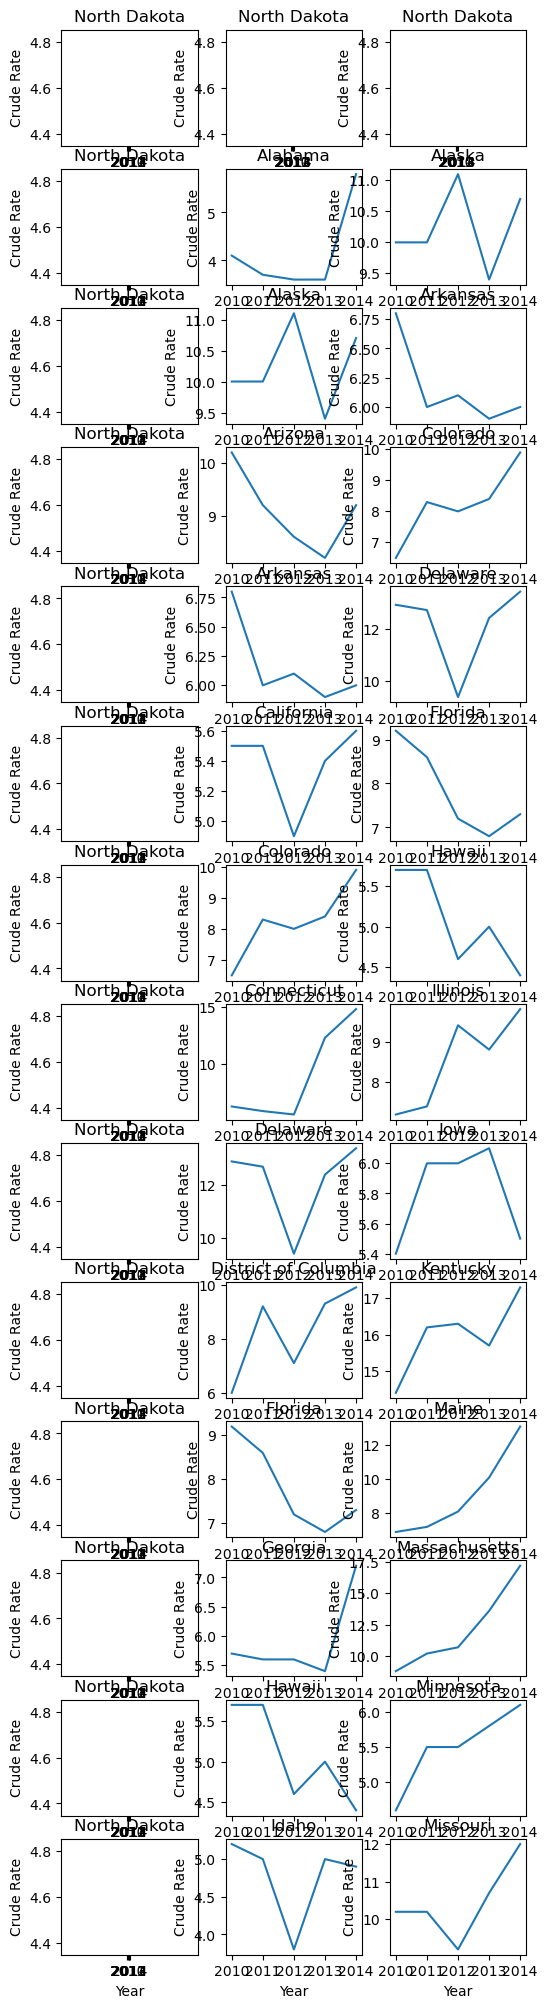

In [27]:
fig, axs = plt.subplots(figsize=(6,25), nrows=14, ncols=3)
state_name = df['State'].unique()

for col in range(3):
    for row in range(14):
        sns.lineplot(data = df[df['State']==state_name[col*row-1]], x='Year', y='Crude Rate', ax = axs[row,col])
        axs[row,col].set_xticks(range(2010, 2015))
        axs[row,col].set_title(state_name[col*row-1])

<AxesSubplot: xlabel='Year', ylabel='Deaths'>

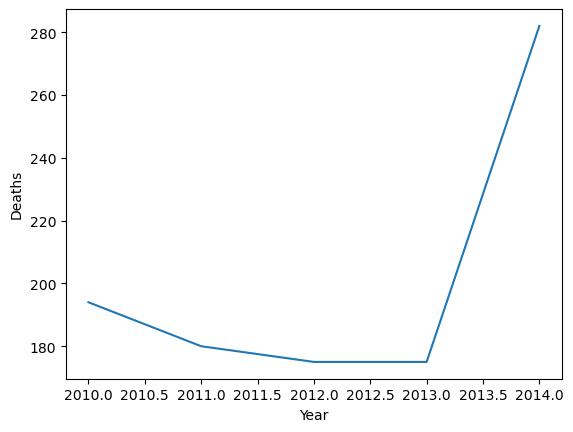

In [17]:
sns.lineplot(data = df[df['State']=='Alabama'], x = 'Year', y = 'Deaths')

## Author Contributions
Jennifer: 
<br>
Irene:
<br>
Zac: 
<br>
Yi: 